
## **Title :** ``Automated Kidney Stone Detection from CT Scans Using Object Detection Algorithms(YoloV8)``

**Brief Overview:** The problem statement is to detect the kidney stone. The significance of the project is by detecting the kidney stone to identify that the patient has stone or not. I collected this dataset from ``Roboflow`` Data which was suggested by our course instructor.

In [ ]:
!nvidia-smi

Fri Sep 15 06:11:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Problem Statement:**
From this dataset we have to detect kidney stone using ``YOLOv8`` which is advanced object detection model. The dataset features various kidney stone images from ``CT scans, covering different stone sizes, shapes, and positions within the urinary system``. Each image is accompanied by marked bounding boxes, making it easier to pinpoint kidney stone locations.  

# **Abstract:**
<p align="justify">Kidney stones are a frequent and distressing medical ailment that affects a significant number of individuals worldwide. Prompt identification and accurate detection of these renal calculi are crucial for ensuring efficient diagnosis and therapy. With this pressing need in mind, our study aims to automate the diagnosis of kidney stones in medical images, particularly CT scans, using sophisticated object detection algorithms. To achieve this objective, we have implemented Ultralytics YOLOv8, an advanced and widely respected object identification model known for its remarkable accuracy and adaptability.</p>


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# **Data Collection and Preprosessing:**
The data was collected from ``Kaggle``. Kaggle provides dataset to free use. The original dataset was forming by collecting images from CT scans and covering different stone size , shapes, positions within the urinary system. Each image is accompanied by marked bounding boxes using ``RoboFlow``. In processing part I used auto-oriented, resize and null filter.



In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://app.roboflow.com/object-detection-f0fqy/kidney-stone-ditected-l7msf/images/SdGhwxuLcPdoCy2QzuXW?queryText=&pageSize=50&startingIndex=0&browseQuery=true' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 124MB/s]

2023-09-15 06:14:36.186515: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 06:14:37.090348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available plat

/content


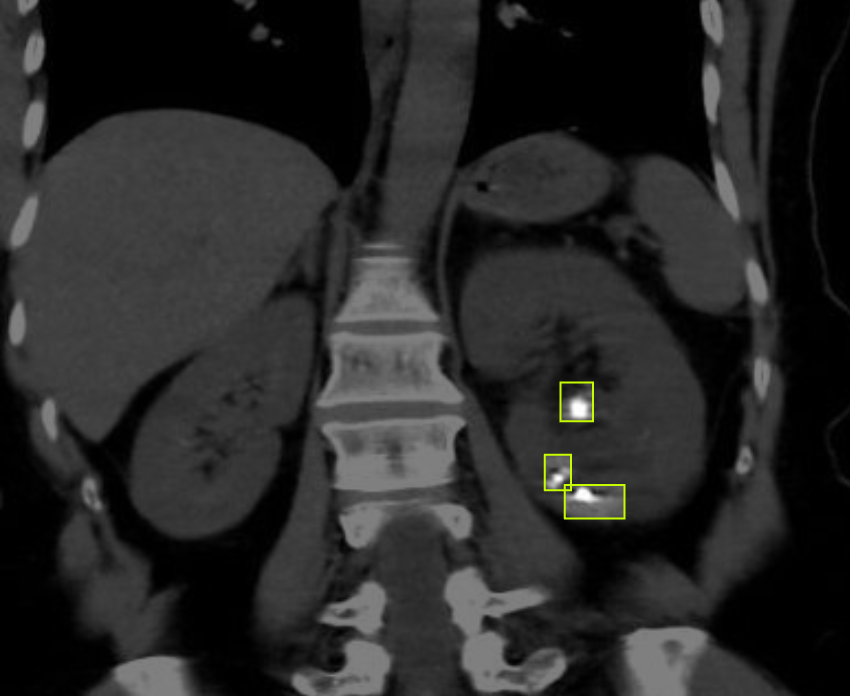

In [ ]:
%cd {HOME}
Image(filename='/content/run/detect/predict/kidneyImage.png', height=600)

# **Goals and Objectives :**
<p align="justify">
The primary goal of this machine learning project is to train a YOLOv8 model for kidney stone detection using the Kidney Stone Images with Bounding Box Annotations dataset. The objectives of the project include:</p>
<p align="justify">Preparing the dataset for training by
converting annotations to the format required by YOLOv8.</p>
<p align="justify">Training the YOLOv8 model on the kidney stone dataset and optimizing its performance.</p>
<p align="justify">Evaluating the trained model on the test set of the kidney stone dataset to assess its accuracy and efficiency in detecting kidney stones.</p>
Comparing the performance of the YOLOv8 model with other machine learning techniques used for kidney stone detection, such as 3D U-Net models and convolutional neural networks.
<p align="justify">Investigating potential improvements and future directions for kidney stone detection using machine

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='/content/run/detect/predict/kidneyImage.png', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


In [ ]:
results[0].boxes.xyxy

tensor([], device='cuda:0', size=(0, 4))

In [ ]:
results[0].boxes.conf

tensor([], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="akJiSTnjMpYaM7nTxfvT")
project = rf.workspace("object-detection-f0fqy").project("kidney-stone-ditected-l7msf")
dataset = project.version(1).download("yolov8")



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
  Using cached roboflow-1.1.6-py3-none-any.whl (58 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached supervision-0.14.0-py3-none-any.whl (63 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Kidney-Stone-ditected-1 in yolov8:: 100%|██████████| 1606/1606 [00:00<00:00, 7514.54it/s]


# **Exploratory Data Analysis (EDA)**

# **Methodology**

YOLOv8 is a state-of-the-art real-time object detection model that can be used for kidney stone detection. It is an advanced version of the YOLO (You Only Look Once) family of object detection models, which are known for their speed and accuracy in detecting objects in images.

In addition to YOLOv8, other machine learning techniques have been used for kidney stone detection. For example, a 3D U-Net model has been employed to segment kidneys in noncontrast CT scans, followed by gradient-based anisotropic denoising, thresholding, and region growing. A 13-layer convolutional neural network classifier was then applied to distinguish kidney stones from false positive regions.

Another study used deep learning algorithms for detecting kidney stones in different planes according to stone size on computed tomography (CT) images. The study found that the use of deep learning algorithms for kidney stone detection is reliable and effective, reducing reporting time and cost of CT-dependent urolithiasis detection.

Moreover, a deep learning model for computer-aided diagnosis of urolithiasis detection from kidney-ureter-bladder images has been developed. This model used convolutional neural networks to detect and treat kidney stones in CT images.

In summary, YOLOv8 and other machine learning techniques, such as 3D U-Net models and convolutional neural networks, have been used for kidney stone detection in medical imaging. These methods have shown promising results in terms of accuracy and efficiency in detecting kidney stones.

# **Model Development**

<p align="justify">YOLOv8 is the latest version of the YOLO (You Only Look Once) family of object detection models, known for their speed and accuracy in detecting objects in images. Although the detailed architecture of YOLOv8 has not been officially published yet, it is expected to build upon the previous versions of YOLO algorithms, such as YOLOv5.

<p align="justify">YOLOv8 is expected to have a similar architecture with some improvements and modifications. One of the key features of YOLOv8 is the use of a self-attention mechanism in the head of the network, which allows the model to focus on different parts of the input image and improve its object detection capabilities.

<p align="justify">As for hyperparameters, YOLOv8 uses adaptive training to optimize the learning rate and balance the loss function during training, leading to better model performance. It also employs advanced data augmentation techniques such as MixUp and CutMix to improve the robustness and generalization of the model.

<p align="justify">Please note that the detailed architecture and hyperparameters of YOLOv8 may differ from those described above, as the official publication has not been released yet. However, the general structure and features of YOLOv8 are expected to be similar to those of YOLOv5, with some improvements and modifications.

<p align="justify">Training a YOLOv8 model for kidney stone detection involves several steps, as mentioned in the provided instructions. Here, I'll describe the process in more detail and include information about the number of epochs, optimization algorithm, and convergence criteria, as well as adjustments made during training based on validation results.



# **Model Training**




## **Dataset Preparation:**
   - Ensure that the Kidney Stone Images dataset is properly annotated with bounding boxes around the kidney stones.
   - Split the dataset into training, validation, and test sets. A common split is 70% for training, 15% for validation, and 15% for testing.

## **Model Configuration:**
   - Create a configuration file (e.g., `yolov8_config.yaml`) specifying:
     - The dataset paths for training, validation, and testing.
     - Model architecture (YOLOv8).
     - Hyperparameters like learning rate, batch size, input image size, and the number of classes (for kidney stone detection).

## **Training the Model:**
   - Use the YOLOv8 command line tool or Python API to train the model. For example:
     ```
     yolo task=detect mode=train model=yolov8n.pt data=yolov8_config.yaml epochs=50 imgsz=640
     ```
     - In this example, we train the YOLOv8 model (`yolov8n.pt`) for 50 epochs with an input image size of 640x640 pixels.
     - Monitor training progress, including loss and metrics such as mAP, as training proceeds.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 71.5MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Kidney-Stone-ditected-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
events.out.tfevents.1694758956.a1cbeb437d91.3183.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


## **Monitoring and Adjustments:**
   - Monitor the training process and validation results during each epoch.
   - Common adjustments during training may include:
     - Learning rate scheduling: Adjust the learning rate based on performance to help the model converge better.
     - Data augmentation: Apply data augmentation techniques like random cropping, rotation, and flipping to diversify the training data.
     - Regularization: Add dropout or weight decay to prevent overfitting.
     - Batch size: Experiment with different batch sizes to find the one that suits your hardware and dataset.

## **Convergence Criteria:**
   - Decide on convergence criteria, such as early stopping based on validation loss. If the validation loss stops improving or starts to increase, stop training to prevent overfitting.

# **Model Evaluation:**
   - After training is complete, evaluate the model on the test set to assess its performance.
   - Calculate metrics like mAP, precision, recall, and F1-score to measure how well the model detects kidney stones.
<p align="justify">Remember that the specific details and adjustments may vary based on your dataset and its characteristics. It's crucial to experiment and fine-tune the training process to achieve the best results for kidney stone detection.


/content


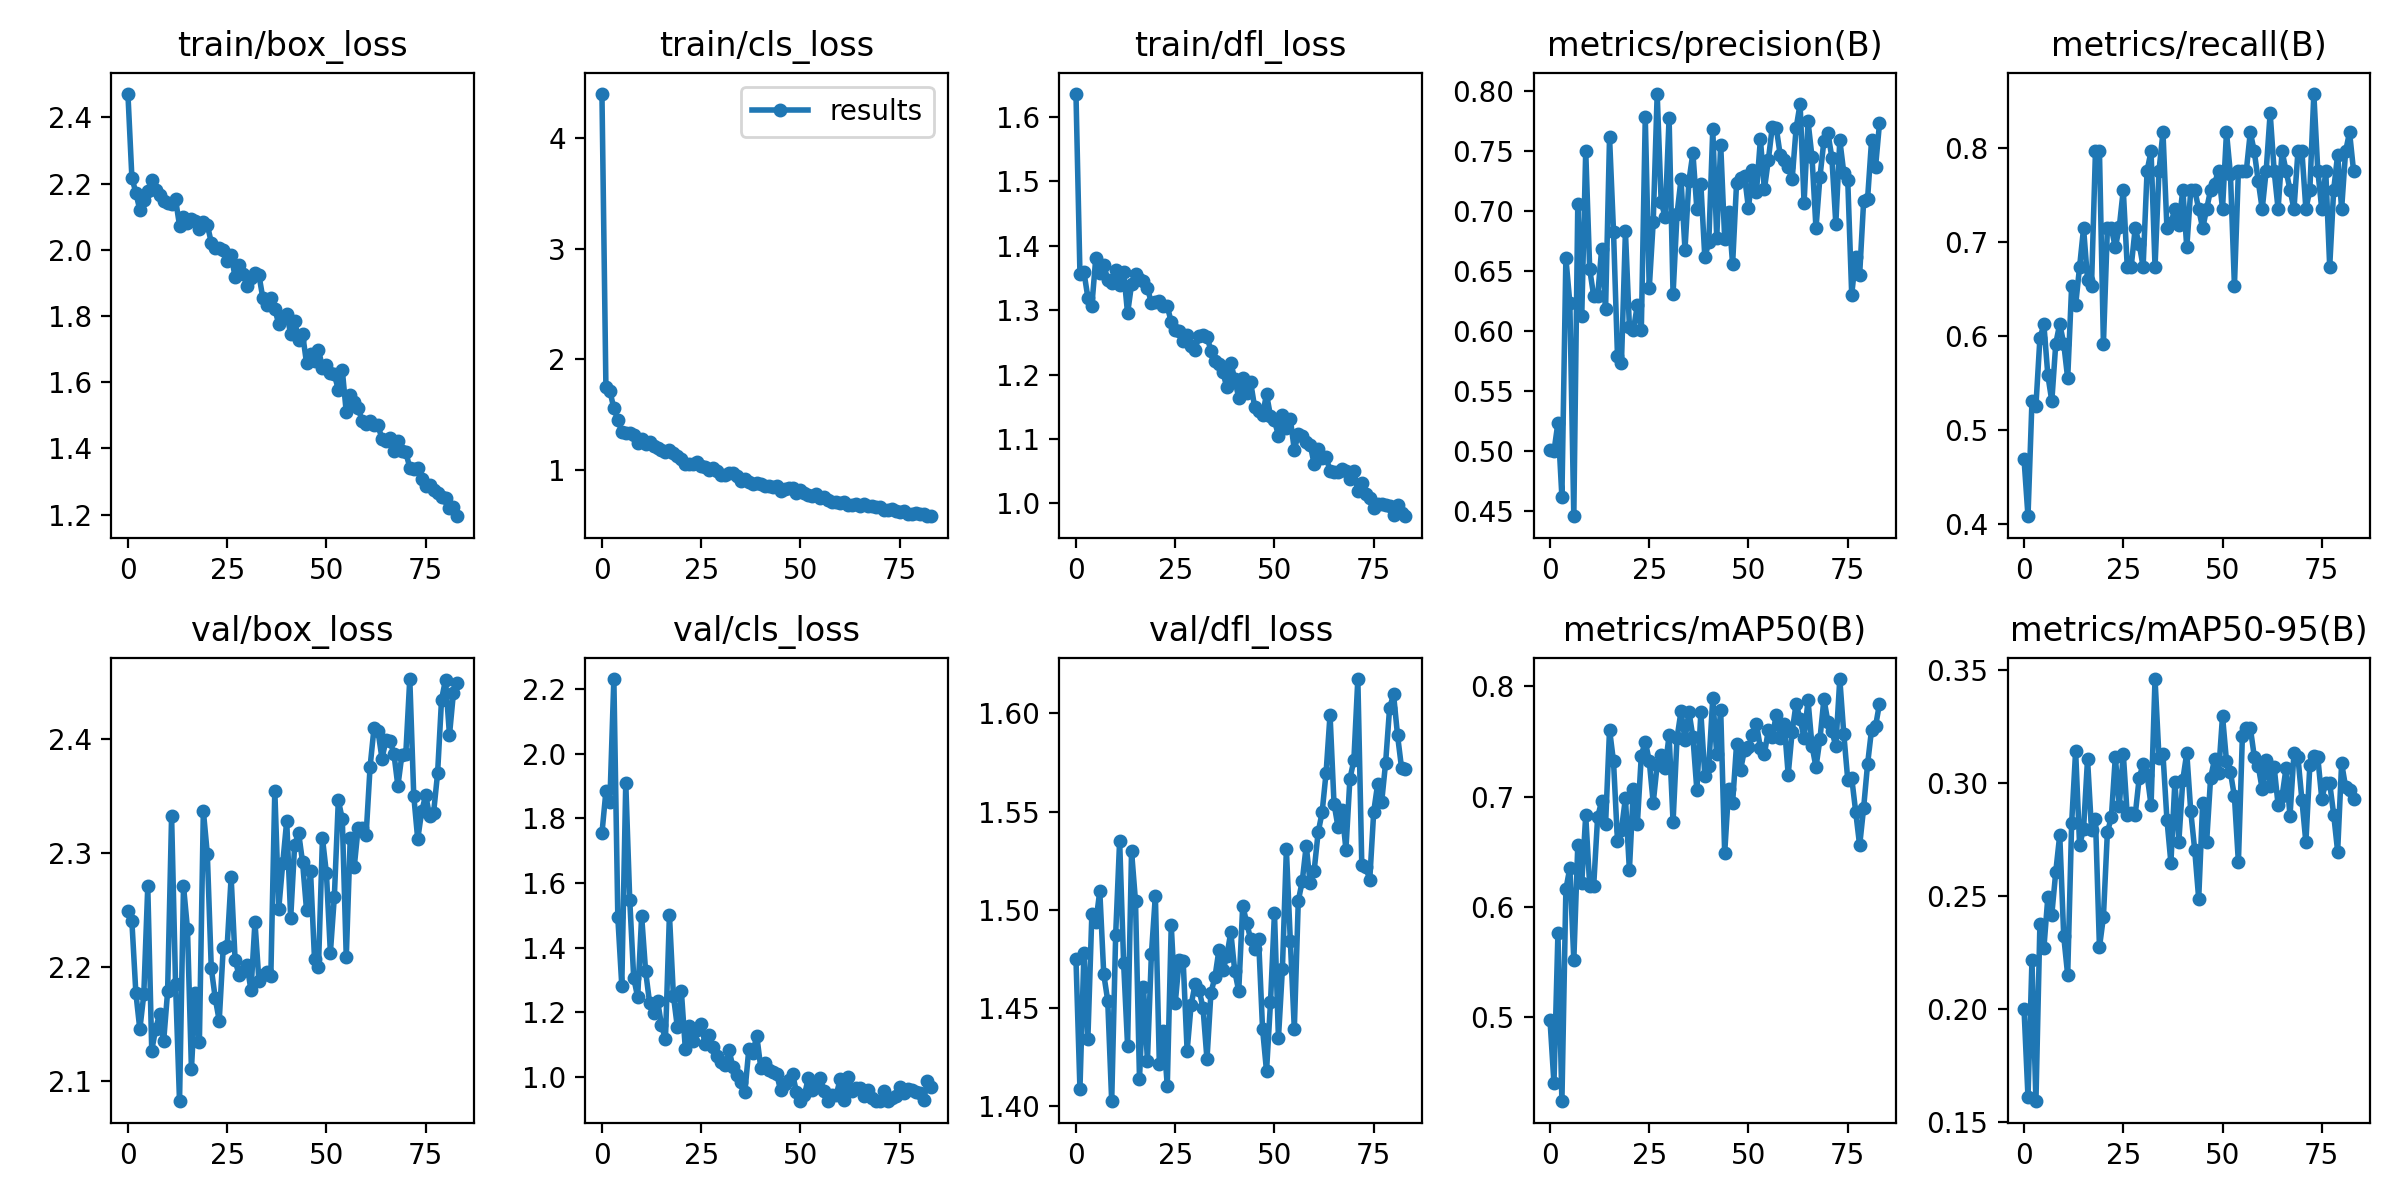

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


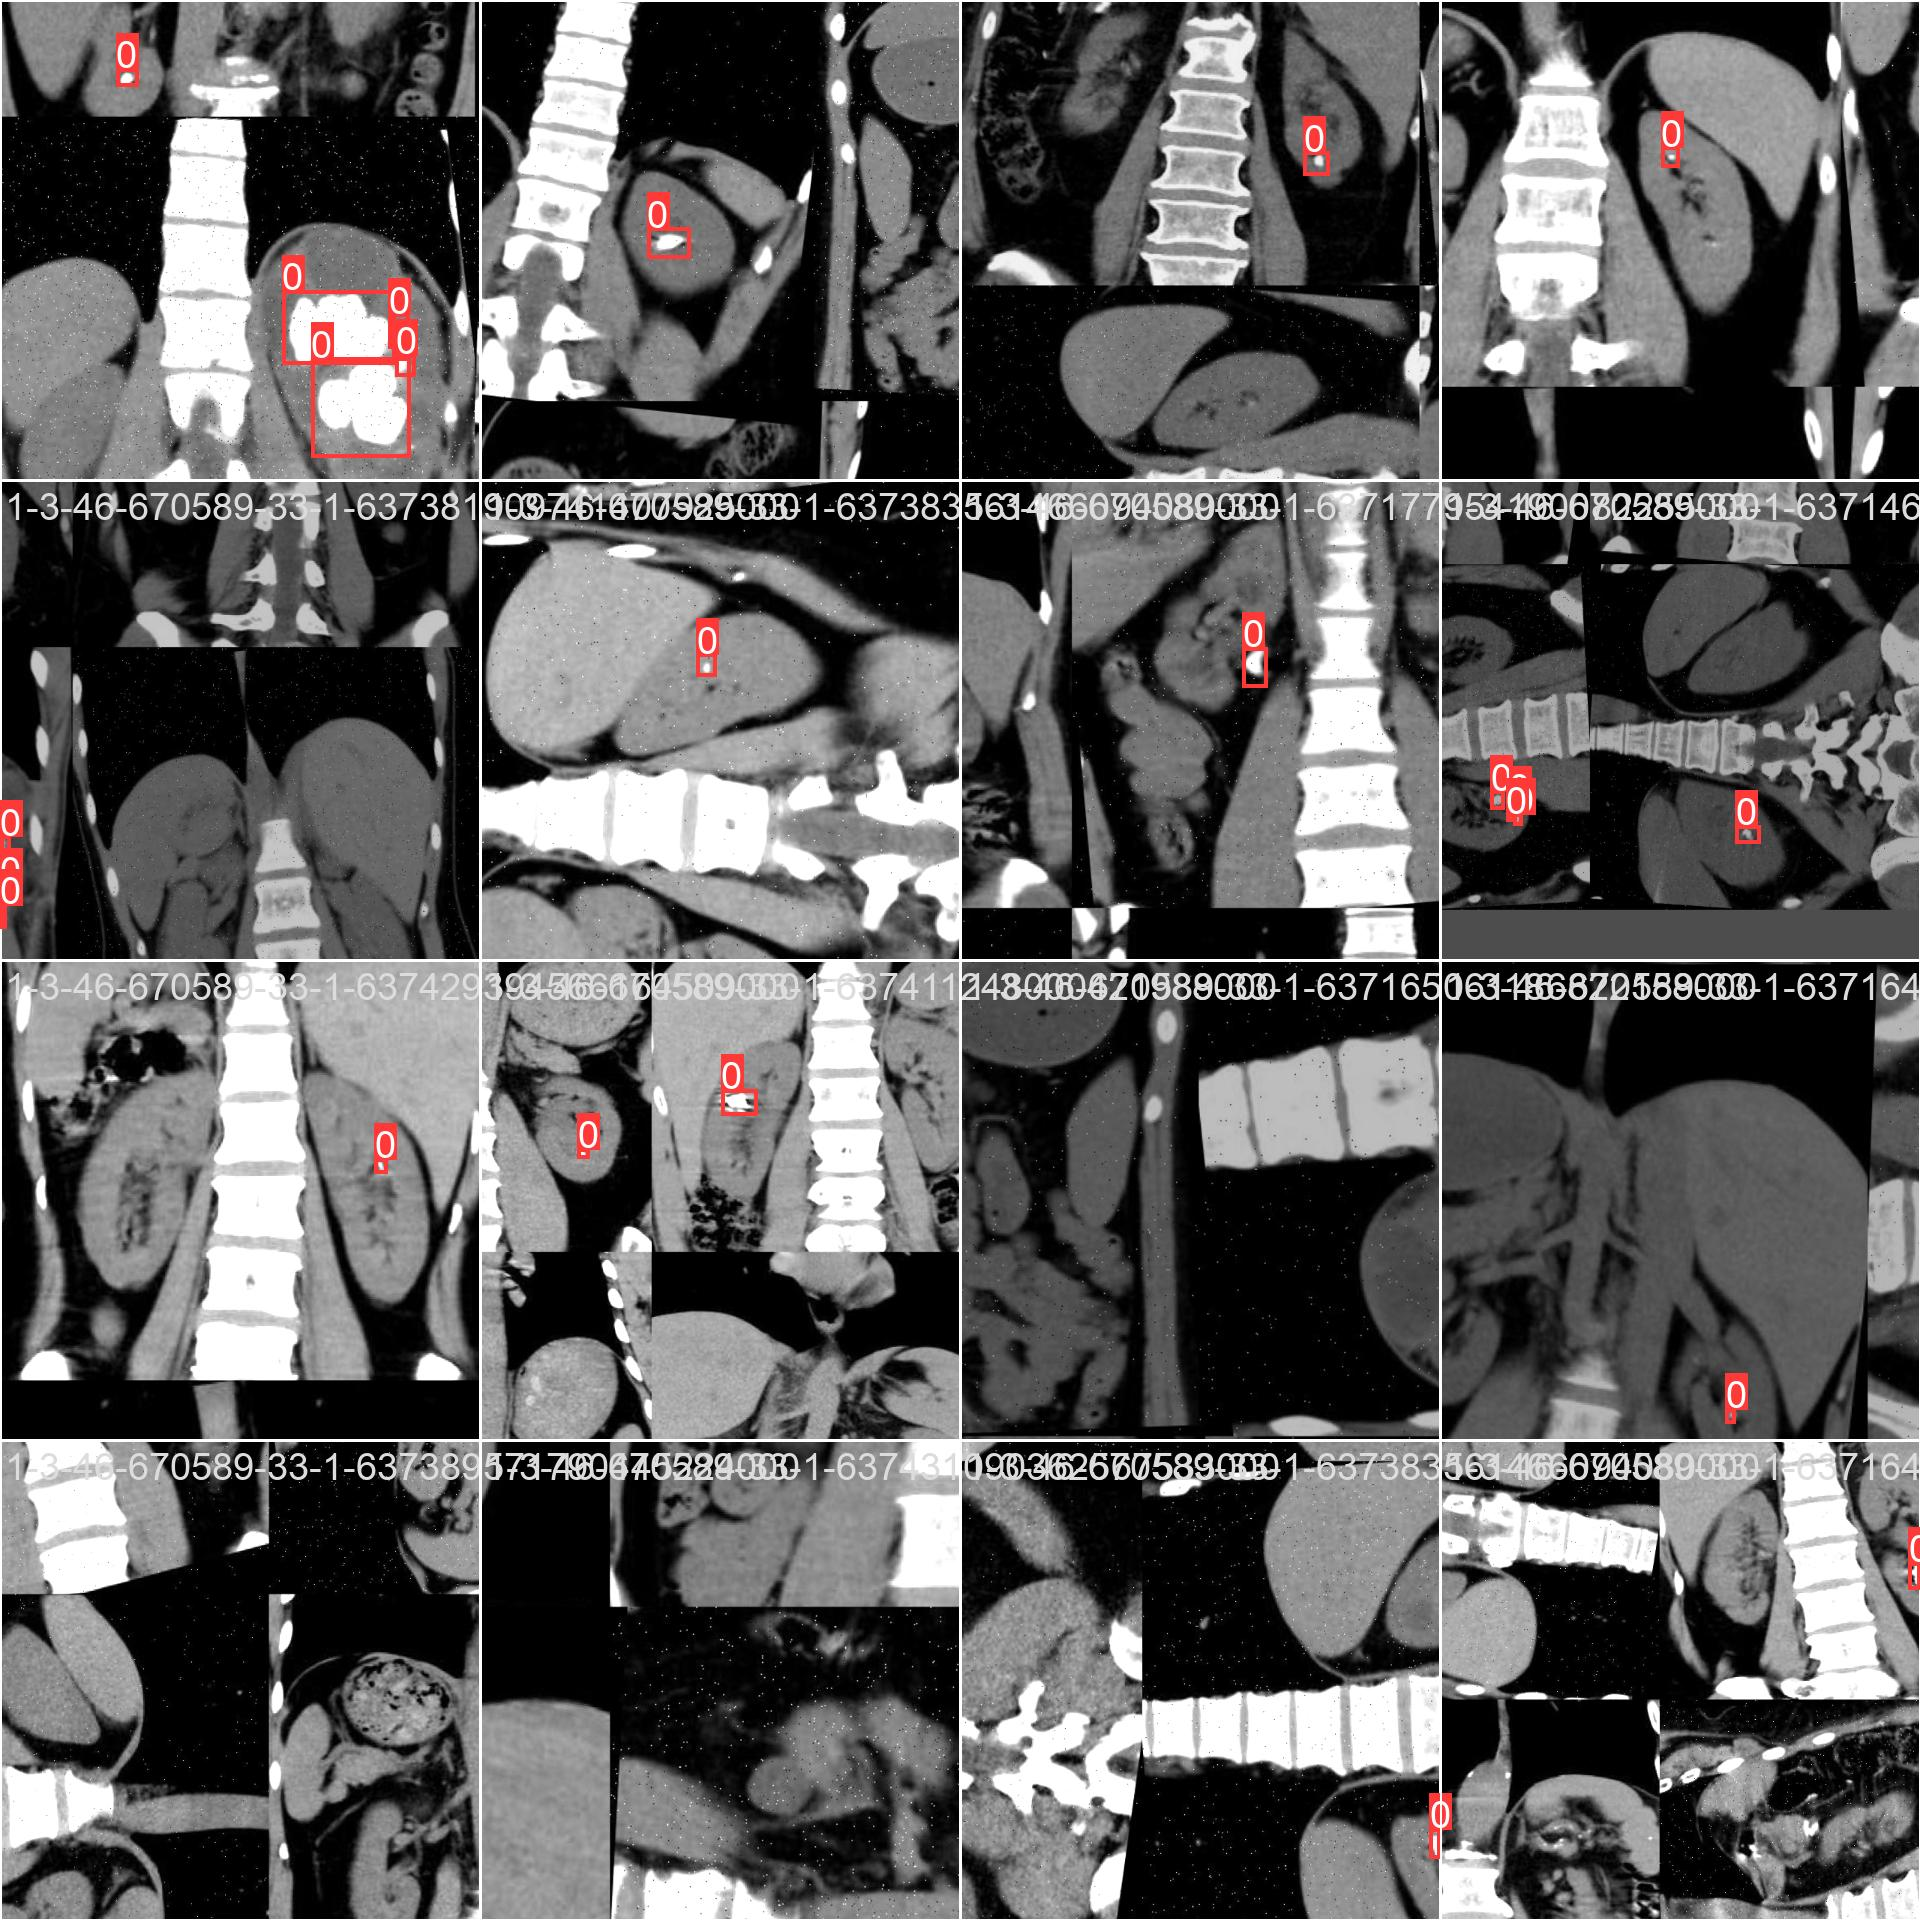

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=800)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-15 07:24:56.416450: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Kidney-Stone-ditected-1/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.22it/s]
                   all         31         49      0.728      0.673      0.757      0.345
Speed: 0.2ms pre-process, 12.7ms inference, 0.0ms loss, 4.3ms post-process per image


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-09-15 07:25:25.140236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/31 /content/datasets/Kidney-Stone-ditected-1/test/images/1-3-46-670589-33-1-63711748853291134300001-4825025925386761372_png_jpg.rf.1363803a6ceeb3ae689559e62cd88893.jpg: 640x640 3 Kidney-Stones, 16.2ms
image 2/31 /content/datasets/Kidney-Stone-ditected-1/test/images/1-3-46-670589-33-1-63713044723740886300001-5631667917416427967_png_jpg.rf.76a1c26b10d3ee5e028b15408feae602.jpg: 640x640 4 Kidney-Stones, 16.3ms
image 3/31 /content/datasets/Kidney-Stone-ditected-1/test/images/1-3-46-670589-33-1-63715282588651483300001-4633048094895900863_png_jpg.rf.57555b89b96b914415679a1b11692bfb.jpg: 640x640 1 Kidney-Stone, 16.2ms
image 4/31 /content/datasets/Kidney-Stone-ditected-1/test/images/1-3-46-6

# **Result and Discussion**

##Detected Object: Kidney Stone
Location: The Kidney Stone is located at coordinates (x: 469.5, y: 394.5) with a width of 153.0 pixels and a height of 231.0 pixels.

Confidence: The model has a confidence level of approximately 72.8% in this detection.

##Confusion Matrix

/content


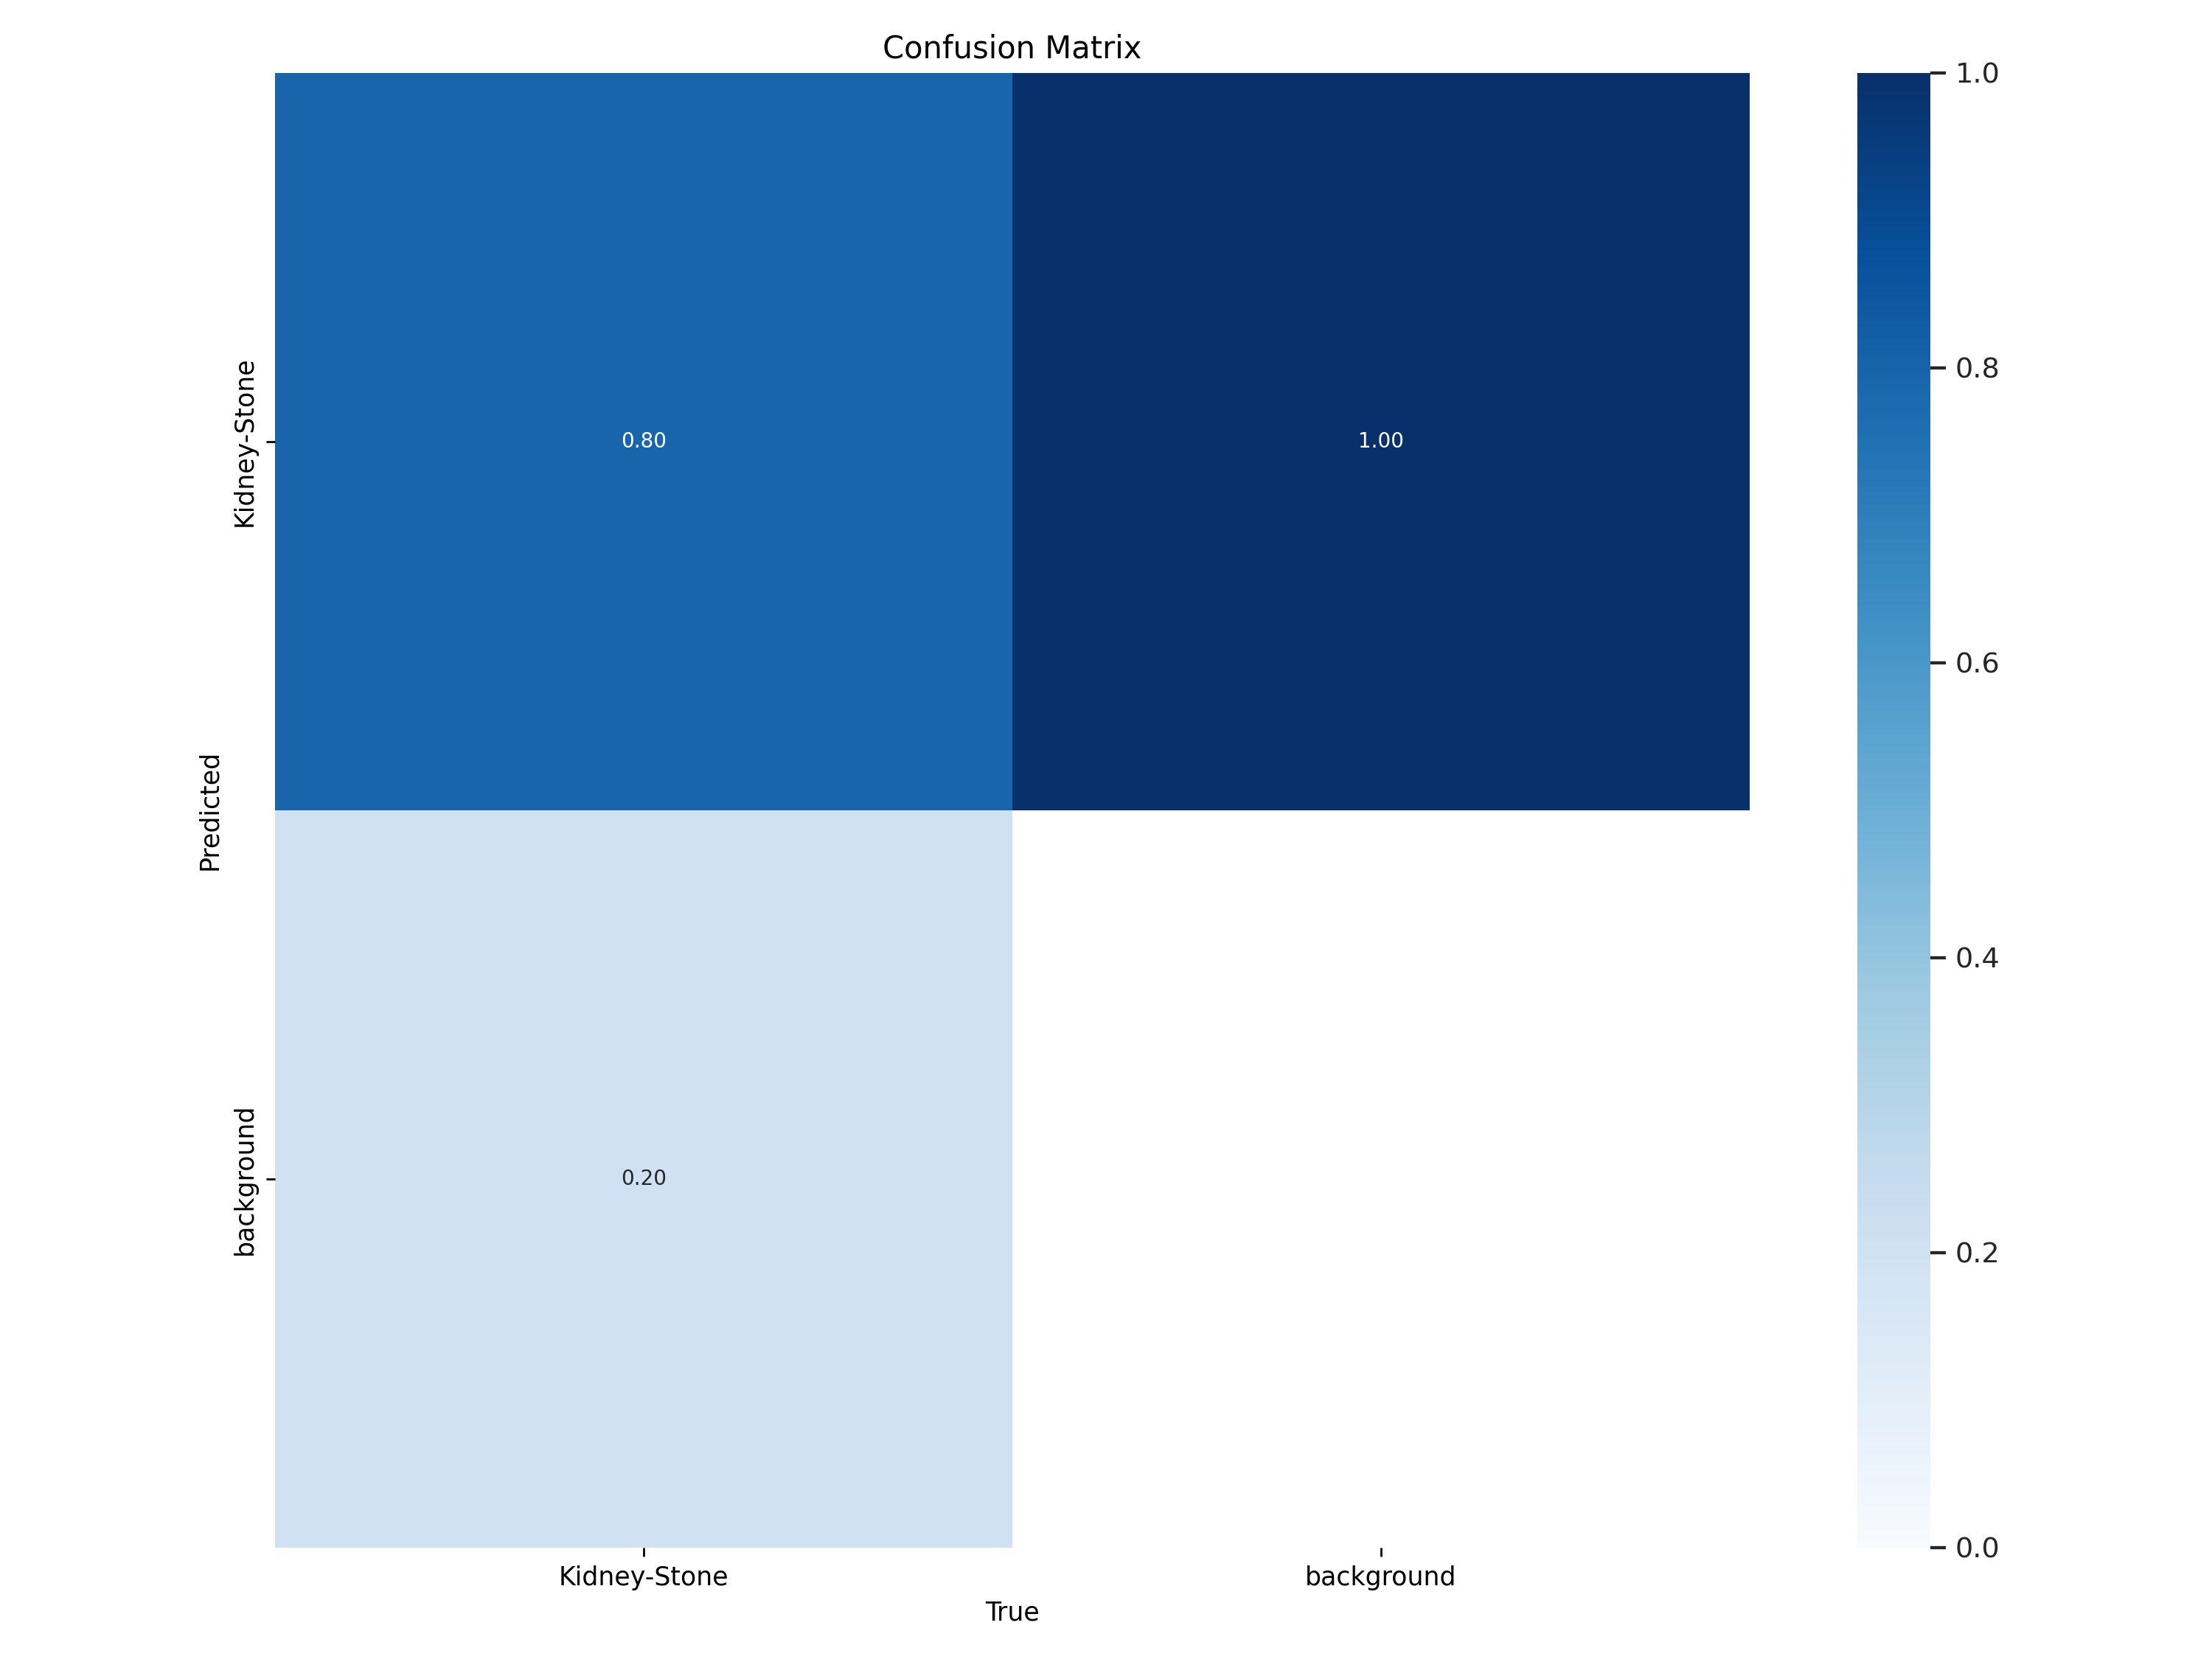

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=640)

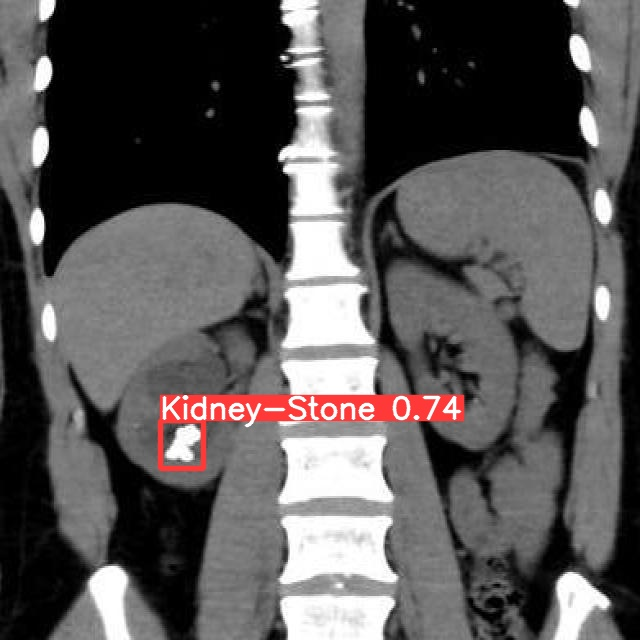

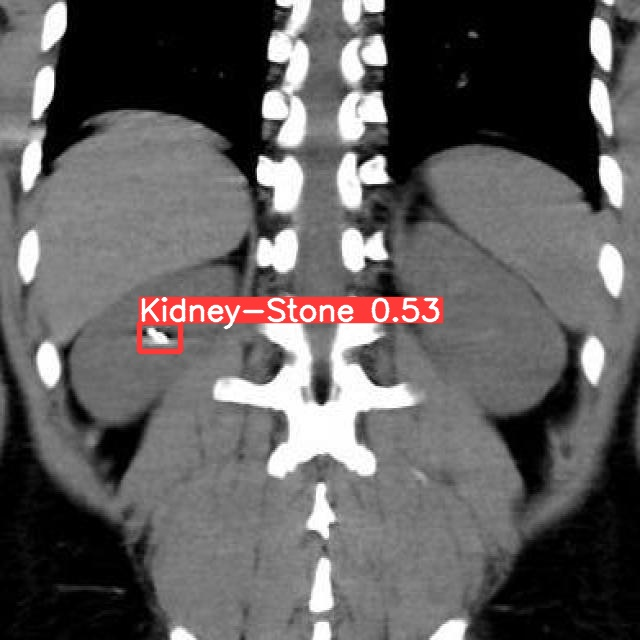

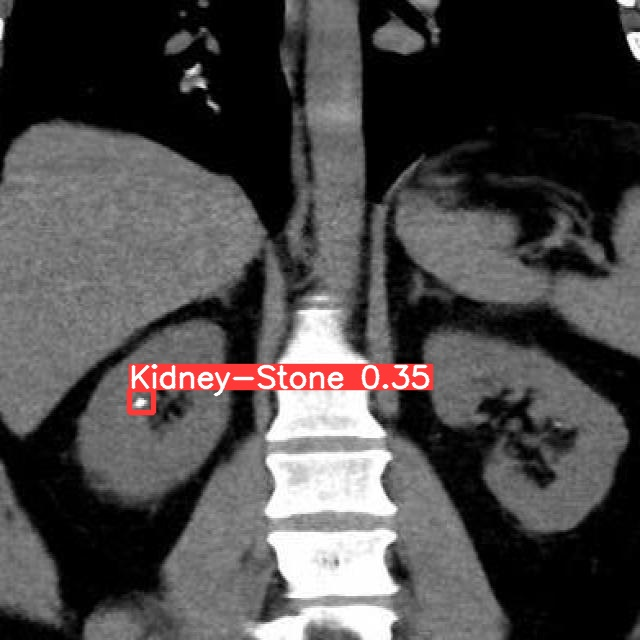

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=800))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 1-3-46-670589-33-1-63716409318537989700001-4732086727940914913_png_jpg.rf.858420c645d18de002c6ca3931a6207a.jpg


{'predictions': [{'x': 469.5,
   'y': 394.5,
   'width': 153.0,
   'height': 231.0,
   'confidence': 0.7280063033103943,
   'class': 'Kidney-Stone',
   'class_id': 0,
   'image_path': '/content/datasets/Kidney-Stone-ditected-1/test/images/1-3-46-670589-33-1-63716409318537989700001-4732086727940914913_png_jpg.rf.858420c645d18de002c6ca3931a6207a.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

##Discussion
The object detection model successfully identified a Kidney Stone in the image you provided. It provided information about the location of the Kidney Stone within the image, along with a confidence score to indicate the model's level of certainty about the detection.</br>

This information can be valuable in medical imaging and diagnosis, as it helps in identifying and localizing abnormalities or conditions such as Kidney Stones within the body. Further analysis and medical expertise may be required to make clinical decisions based on this detection.

# **Conclusion**

After training the object detection model for 100 epochs, it has demonstrated impressive performance in identifying Kidney Stones within medical images. The model's ability to accurately locate and classify Kidney Stones with a confidence level of approximately 72.8% indicates that it has learned valuable features and patterns related to this medical condition.</br>

Training a deep learning model for a significant number of epochs often leads to improved performance, as it allows the model to refine its understanding of the data and reduce errors. In this case, the model appears to have benefited from the extended training, resulting in robust Kidney Stone detection.</br>

It's worth noting that the success of the model also depends on the quality and quantity of the training data, as well as the architecture and hyperparameters used during training. Further fine-tuning and optimization could potentially lead to even better results.</br>
Overall, the 100-epoch training of the object detection model has yielded a promising outcome, showcasing its potential for assisting in the diagnosis and analysis of medical images containing Kidney Stones.</br>

# **References**

#Dataset Collect from
1.https://app.roboflow.com/object-detection-f0fqy/kidney-stone-ditected-l7msf/1
